Nolan Roth <br>
PHYS 434

# Lab 6

In [63]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import random
from scipy import stats
from scipy import signal
from scipy.stats import norm
from astropy.table import QTable, Table, Column
from astropy import units as u
import numpy as np
import pickle

plt.rcParams["figure.figsize"] = (15, 10)

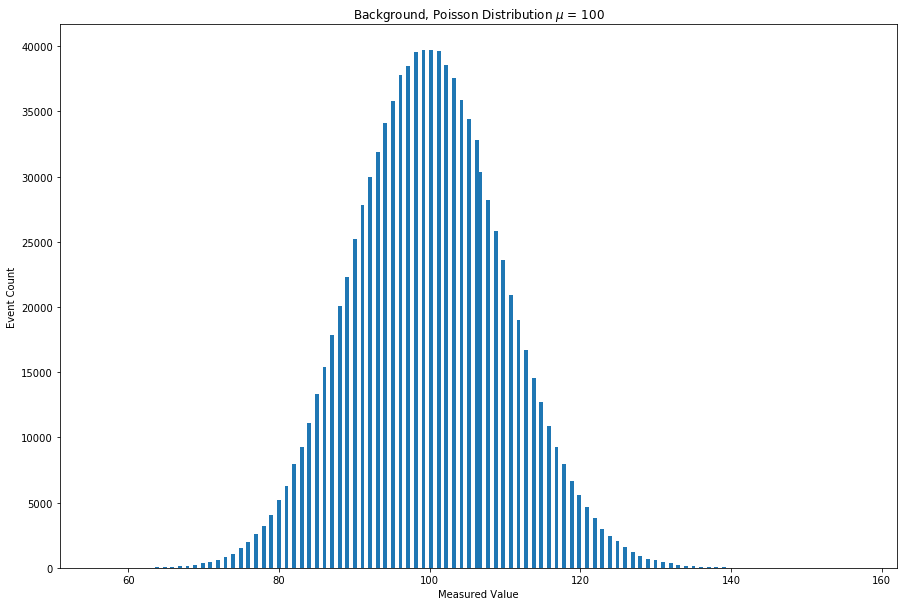

In [98]:
mu = 100
background = stats.poisson.rvs(mu, size=1000000)
plt.hist(background, bins=200)
plt.title('Background, Poisson Distribution $\mu$ = 100')
plt.ylabel('Event Count')
plt.xlabel('Measured Value')
plt.show()

## Problem 1

Determining the 5$\sigma$ threshold for the background distribution:

In [212]:
threshold = stats.poisson.ppf(1 - prob, 100)
print(threshold)

154.0


## Problem 2

Injecting a signal of strength 300 into the background data 10000 times:

In [156]:
for i in range(10000):
    background[i] += 200

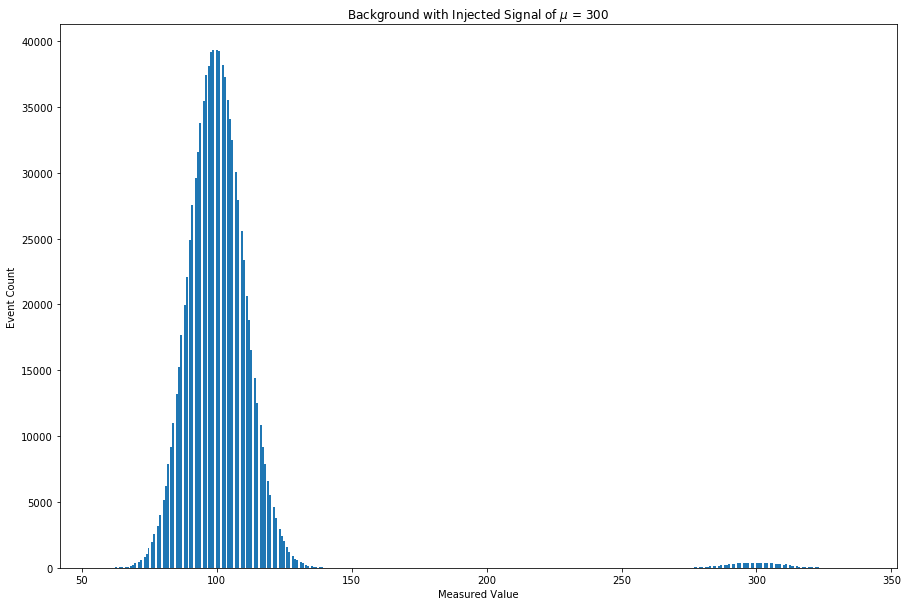

In [104]:
plt.hist(background, bins=400)
plt.title('Background with Injected Signal of $\mu$ = 300')
plt.xlabel('Measured Value')
plt.ylabel('Event Count')
plt.show()

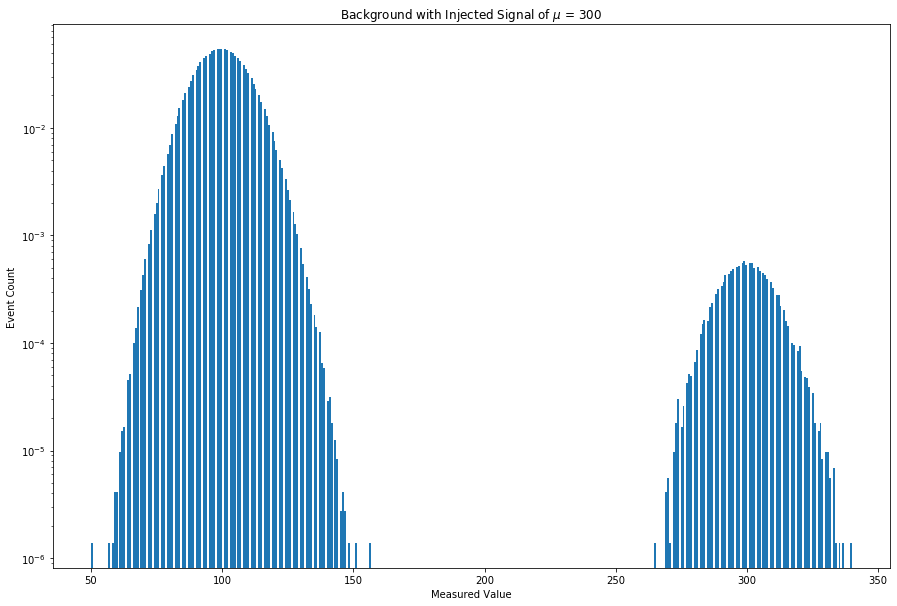

In [158]:
plt.hist(background, bins=400, density=True)
plt.title('Background with Injected Signal of $\mu$ = 300')
plt.xlabel('Measured Value')
plt.ylabel('Event Count')
plt.yscale('Log')
plt.show()

The observed signal is not very bright, as we can see from the first histogram plot. It is Guassian in shape, which makes sense because we have a Poisson distribution with a large sample size. Because we injected the signal randomly into the background, the resulting observed signal should be Guassian shaped as well. This means the signal is not biased and is symmetric.

## Problem 3

Creating a uniform distribution of signals:

In [217]:
signal = np.random.uniform(0, 500, 1000000)
background = stats.poisson.rvs(mu, size=1000000)

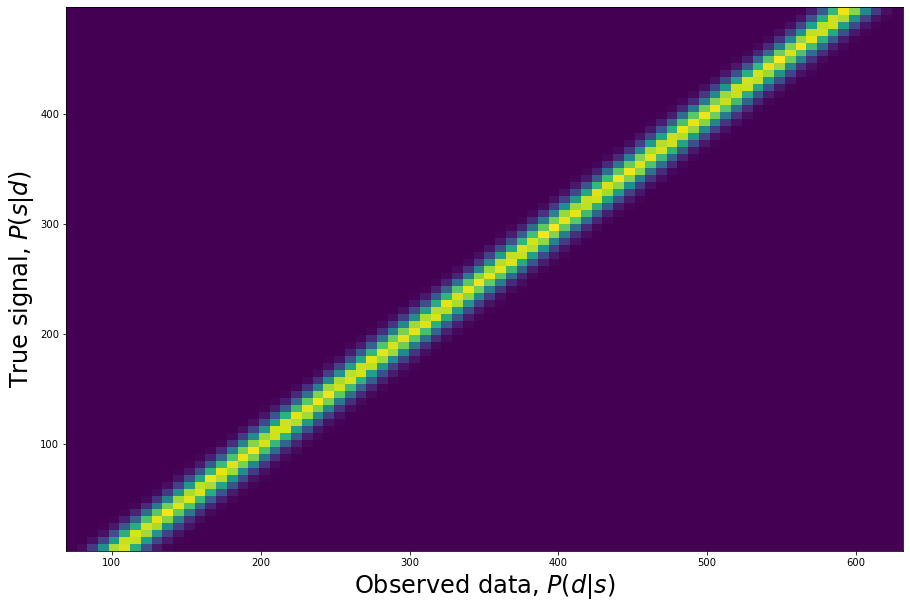

In [107]:
data = background + signal

signaledges = np.linspace(min(signal), max(signal), 80)
dataedges = np.linspace(min(data), max(data), 80)

Psd, temp, temp2 = np.histogram2d(data, signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.show()

I am simulating injecting a range of signals into the dataset and the above histogram is showing how the observed signal changes as I inject different signal strengths.

In [197]:
def takeSignalSlice(value):
    index = 0
    for i in range(len(signaledges)):
        if (value > signaledges[i]):
            index = i
    return index - 1

In [198]:
def takeDataSlice(value):
    index = 0
    for i in range(len(dataedges)):
        if (value > dataedges[i]):
            index = i
    return index - 1

Plotting a horizontal slice of the above 2D histogram for the true signal value of 300:

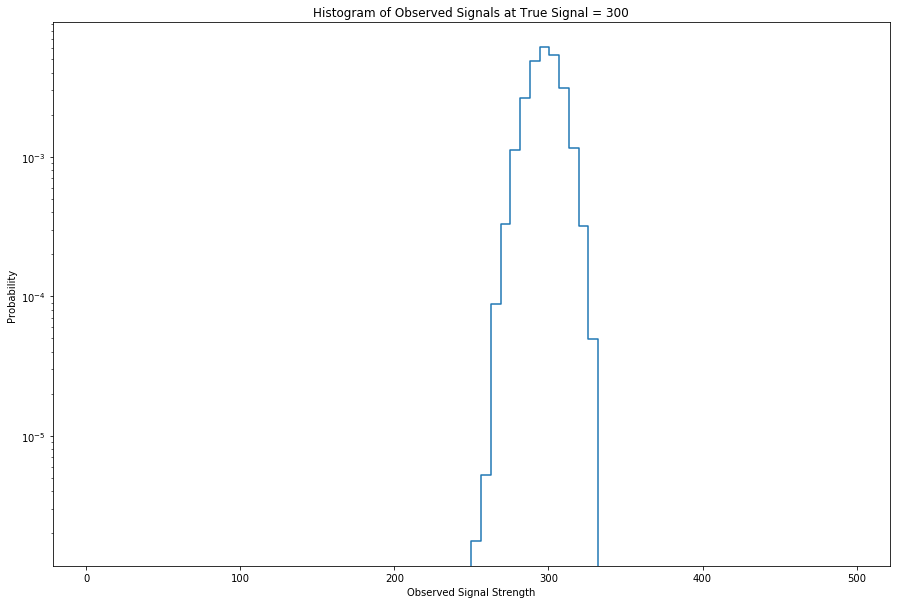

In [207]:
y = Psd[:][takeSignalSlice(300)]
plt.step(signalcenters, y*80)
plt.yscale('Log')
plt.title('Histogram of Observed Signals at True Signal = 300')
plt.ylabel('Probability')
plt.xlabel('Observed Signal Strength')
plt.show()

This is the histogram of the observed signals at a constant injected signal power. It is the same injected signal power as problem 2, and we can see that the plots look nearly identical.

To reverse the problem, I take a vertical slice of the above 2D histogram:

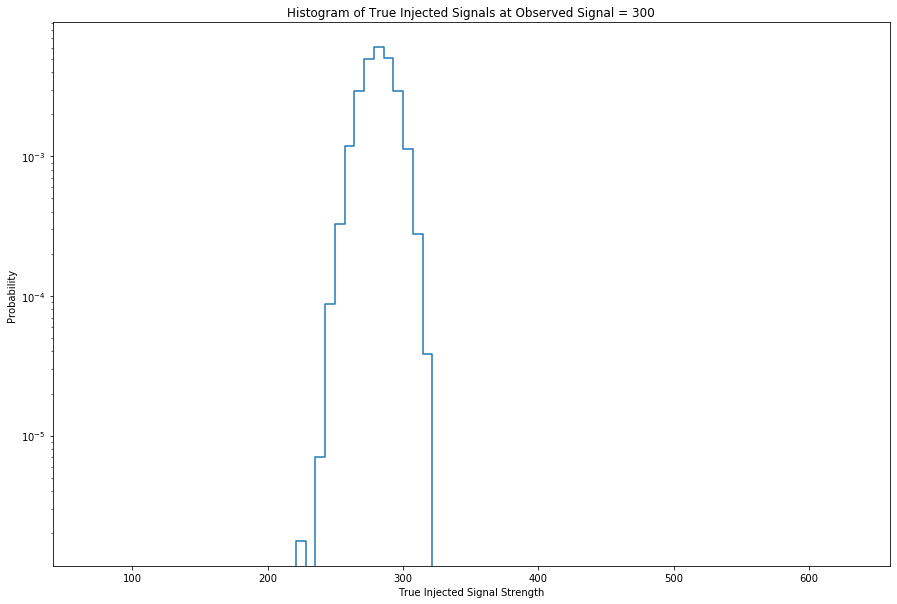

In [209]:
y = Psd[takeDataSlice(300)][:]
plt.step(datacenters, y*80)
plt.yscale('Log')
plt.title('Histogram of True Injected Signals at Observed Signal = 300')
plt.ylabel('Probability')
plt.xlabel('True Injected Signal Strength')
plt.show()

This is a histogram of true injected signals at a constant observed signal power. We can see that even though the observed signal power is 300, the mean of the injected signal is slightly smaller than 300. 

Finding the 1$\sigma$ uncertainty on the true signal strength:

In [218]:
sd = np.std(signal)
print(sd)

144.38488632624654
